# Loan predictions

## Problem Statement

We want to automate the loan eligibility process based on customer details that are provided as online application forms are being filled. You can find the dataset [here](https://drive.google.com/file/d/1h_jl9xqqqHflI5PsuiQd_soNYxzFfjKw/view?usp=sharing). These details concern the customer's Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and other things as well. 

|Variable| Description|
|: ------------- |:-------------|
|Loan_ID| Unique Loan ID|
|Gender| Male/ Female|
|Married| Applicant married (Y/N)|
|Dependents| Number of dependents|
|Education| Applicant Education (Graduate/ Under Graduate)|
|Self_Employed| Self employed (Y/N)|
|ApplicantIncome| Applicant income|
|CoapplicantIncome| Coapplicant income|
|LoanAmount| Loan amount in thousands|
|Loan_Amount_Term| Term of loan in months|
|Credit_History| credit history meets guidelines|
|Property_Area| Urban/ Semi Urban/ Rural|
|Loan_Status| Loan approved (Y/N)



### Explore the problem in following stages:

1. Hypothesis Generation – understanding the problem better by brainstorming possible factors that can impact the outcome
2. Data Exploration – looking at categorical and continuous feature summaries and making inferences about the data.
3. Data Cleaning – imputing missing values in the data and checking for outliers
4. Feature Engineering – modifying existing variables and creating new ones for analysis
5. Model Building – making predictive models on the data

## 1. Hypothesis Generation

Generating a hypothesis is a major step in the process of analyzing data. This involves understanding the problem and formulating a meaningful hypothesis about what could potentially have a good impact on the outcome. This is done BEFORE looking at the data, and we end up creating a laundry list of the different analyses which we can potentially perform if data is available.

#### Possible hypotheses
Which applicants are more likely to get a loan

1. Applicants having a credit history 
2. Applicants with higher applicant and co-applicant incomes
3. Applicants with higher education level
4. Properties in urban areas with high growth perspectives

Do more brainstorming and create some hypotheses of your own. Remember that the data might not be sufficient to test all of these, but forming these enables a better understanding of the problem.

## 2. Data Exploration
Let's do some basic data exploration here and come up with some inferences about the data. Go ahead and try to figure out some irregularities and address them in the next section. 

In [394]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm

df = pd.read_csv("data.csv") 
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


One of the key challenges in any data set are missing values. Lets start by checking which columns contain missing values.

In [395]:
df = df.drop('Loan_ID', axis=1)

In [396]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Look at some basic statistics for numerical variables.

In [397]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [398]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

1. How many applicants have a `Credit_History`? (`Credit_History` has value 1 for those who have a credit history and 0 otherwise)
2. Is the `ApplicantIncome` distribution in line with your expectation? Similarly, what about `CoapplicantIncome`?
3. Tip: Can you see a possible skewness in the data by comparing the mean to the median, i.e. the 50% figure of a feature.



Let's discuss nominal (categorical) variable. Look at the number of unique values in each of them.

In [399]:
cat_feats = df.dtypes[df.dtypes == 'object'].index.tolist()
num_feats = df.dtypes[~df.dtypes.index.isin(cat_feats)].index.tolist()

(array([533.,  59.,  15.,   0.,   4.,   0.,   1.,   1.,   0.,   1.]),
 array([  150.,  8235., 16320., 24405., 32490., 40575., 48660., 56745.,
        64830., 72915., 81000.]),
 <BarContainer object of 10 artists>)

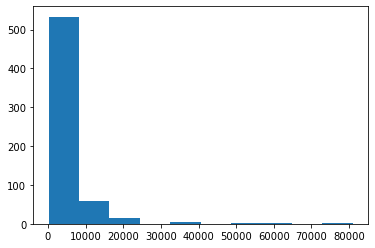

In [400]:
#applicant income

plt.hist(df['ApplicantIncome'])

In [401]:
df['ApplicantIncome'].median()

3812.5

In [402]:
df['ApplicantIncome'].describe()

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

(array([561.,  46.,   3.,   0.,   2.,   0.,   0.,   0.,   1.,   1.]),
 array([    0. ,  4166.7,  8333.4, 12500.1, 16666.8, 20833.5, 25000.2,
        29166.9, 33333.6, 37500.3, 41667. ]),
 <BarContainer object of 10 artists>)

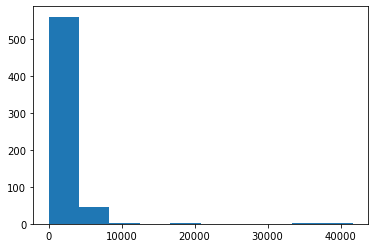

In [403]:
# coapplicant income

plt.hist(df['CoapplicantIncome'])

In [404]:
df['CoapplicantIncome'].median()

1188.5

In [405]:
df['CoapplicantIncome'].describe()

count      614.000000
mean      1621.245798
std       2926.248369
min          0.000000
25%          0.000000
50%       1188.500000
75%       2297.250000
max      41667.000000
Name: CoapplicantIncome, dtype: float64

In [406]:
#surprised that coapplicant income is larger than primary income. 

#most applicant income is within the 0-100,000 range

#significant outliers exist within the income that could throw off a accurate results


(array([ 72., 310., 143.,  33.,  15.,   6.,   5.,   3.,   3.,   2.]),
 array([  9. ,  78.1, 147.2, 216.3, 285.4, 354.5, 423.6, 492.7, 561.8,
        630.9, 700. ]),
 <BarContainer object of 10 artists>)

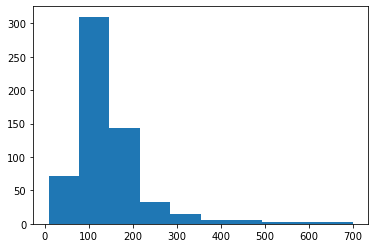

In [407]:
#loanAmount 

plt.hist(df['LoanAmount'])

In [408]:
df['LoanAmount'].median()

128.0

In [409]:
df['LoanAmount'].describe()

count    592.000000
mean     146.412162
std       85.587325
min        9.000000
25%      100.000000
50%      128.000000
75%      168.000000
max      700.000000
Name: LoanAmount, dtype: float64

In [410]:
df['LoanAmount'].value_counts()

120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: LoanAmount, Length: 203, dtype: int64

(array([  3.,   6.,   3.,  44.,   4.,   0.,  13., 512.,   0.,  15.]),
 array([ 12. ,  58.8, 105.6, 152.4, 199.2, 246. , 292.8, 339.6, 386.4,
        433.2, 480. ]),
 <BarContainer object of 10 artists>)

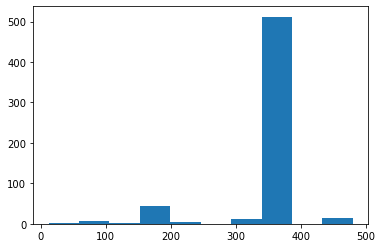

In [411]:
#Loan_Amount_Term

plt.hist(df['Loan_Amount_Term'])

In [412]:
df['Loan_Amount_Term'].median()

360.0

In [413]:
df['Loan_Amount_Term'].describe()

count    600.00000
mean     342.00000
std       65.12041
min       12.00000
25%      360.00000
50%      360.00000
75%      360.00000
max      480.00000
Name: Loan_Amount_Term, dtype: float64

In [414]:
df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [415]:
#Credit_History

df['Credit_History'].value_counts()


#614 entries with 50 null values

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [416]:
df['Credit_History'].isnull().sum()

50

In [417]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [418]:
df_grouped_Education = df.groupby('Education').agg(avg_income_education = ('ApplicantIncome', 'mean')).reset_index()


In [419]:
df_grouped_Gender = df.groupby('Gender').agg(avg_income_gender = ('ApplicantIncome', 'mean')).reset_index()

In [420]:
df_grouped_Area = df.groupby('Property_Area').agg(avg_loan_amount_property = ('LoanAmount', 'mean')).reset_index()

In [421]:
df_grouped_Term = df.groupby('Loan_Amount_Term').agg(avg_loan_amount_term = ('LoanAmount', 'mean')).reset_index()

In [422]:
df['Total_Applicant_Income'] = df['ApplicantIncome'] +df['CoapplicantIncome']

<AxesSubplot:>

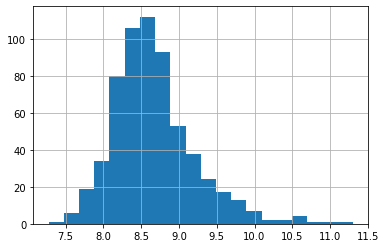

In [423]:
df['TotalIncome_log']=np.log(df['Total_Applicant_Income'])
df['TotalIncome_log'].hist(bins=20)

In [424]:
df = df_grouped_Education.merge(df,
                left_on='Education', 
                right_on = 'Education',
                how='inner')

In [425]:
df = df_grouped_Gender.merge(df,
                left_on='Gender', 
                right_on = 'Gender',
                how='inner')

In [426]:
df_grouped_Gender, df_grouped_Education, df_grouped_Area, df_grouped_Term

(   Gender  avg_income_gender
 0  Female        4643.473214
 1    Male        5446.460123,
       Education  avg_income_education
 0      Graduate           5857.433333
 1  Not Graduate           3777.283582,
   Property_Area  avg_loan_amount_property
 0         Rural                152.260116
 1     Semiurban                145.504386
 2         Urban                142.198953,
    Loan_Amount_Term  avg_loan_amount_term
 0              12.0            111.000000
 1              36.0            117.500000
 2              60.0            140.000000
 3              84.0            132.250000
 4             120.0             22.333333
 5             180.0            147.523810
 6             240.0            118.333333
 7             300.0            185.153846
 8             360.0            147.245436
 9             480.0            151.800000)

Explore further using the frequency of different categories in each nominal variable. Exclude the ID obvious reasons.

In [427]:
#categorical variables
df[cat_feats]

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Female,No,0,Graduate,No,Urban,N
1,Female,No,2,Graduate,NaN,Semiurban,Y
2,Female,Yes,0,Graduate,No,Semiurban,Y
3,Female,No,0,Graduate,No,Urban,Y
4,Female,Yes,0,Graduate,No,Urban,N
...,...,...,...,...,...,...,...
596,Male,No,0,Not Graduate,No,Rural,Y
597,Male,Yes,2,Not Graduate,Yes,Rural,N
598,Male,Yes,0,Not Graduate,NaN,Rural,Y
599,Male,Yes,0,Not Graduate,No,Urban,N


In [428]:
df['Self_Employed'] = df['Self_Employed'].fillna(value='No') 

In [429]:
df[cat_feats].isnull().sum()

Gender            0
Married           3
Dependents       15
Education         0
Self_Employed     0
Property_Area     0
Loan_Status       0
dtype: int64

In [430]:
df['Dependents'].value_counts()

0     338
1     101
2      99
3+     48
Name: Dependents, dtype: int64

In [431]:
df['Dependents'] = df['Dependents'].fillna(value=0)

In [432]:
df['Married'] = df['Married'].fillna(value='No')

In [433]:
df[cat_feats]

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Female,No,0,Graduate,No,Urban,N
1,Female,No,2,Graduate,No,Semiurban,Y
2,Female,Yes,0,Graduate,No,Semiurban,Y
3,Female,No,0,Graduate,No,Urban,Y
4,Female,Yes,0,Graduate,No,Urban,N
...,...,...,...,...,...,...,...
596,Male,No,0,Not Graduate,No,Rural,Y
597,Male,Yes,2,Not Graduate,Yes,Rural,N
598,Male,Yes,0,Not Graduate,No,Rural,Y
599,Male,Yes,0,Not Graduate,No,Urban,N


In [434]:
df[num_feats].isnull().sum()

ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       49
dtype: int64

In [435]:
#Turning Credit_History into a categorical variable


In [436]:
df['Credit_History'].value_counts()

1.0    466
0.0     86
Name: Credit_History, dtype: int64

In [437]:
# df['Credit_History'] = pd.cut(df['Credit_History'], 2, labels=["Yes", "No"])

In [438]:
df['Credit_History'] = df['Credit_History'].replace(to_replace=0, value='No')
df['Credit_History'] = df['Credit_History'].replace(to_replace=1, value='Yes')

In [439]:
df['Credit_History'].info()

<class 'pandas.core.series.Series'>
Int64Index: 601 entries, 0 to 600
Series name: Credit_History
Non-Null Count  Dtype 
--------------  ----- 
552 non-null    object
dtypes: object(1)
memory usage: 9.4+ KB


In [440]:
cat_feats = ['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status',
 'Credit_History',]

num_feats =['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term']

In [441]:
num_feats = df.dtypes[~df.dtypes.index.isin(cat_feats)].index.tolist()

In [442]:
num_feats

['avg_income_gender',
 'avg_income_education',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Total_Applicant_Income',
 'TotalIncome_log']

In [443]:
df[num_feats].isnull().sum()

avg_income_gender          0
avg_income_education       0
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                22
Loan_Amount_Term          14
Total_Applicant_Income     0
TotalIncome_log            0
dtype: int64

In [444]:
df = df.dropna()

#Removed remaining null values. Without having a loan amount all other considerations are irrelevant since outcome depends on loan value 

In [445]:
df.isnull().sum()

Gender                    0
avg_income_gender         0
Education                 0
avg_income_education      0
Married                   0
Dependents                0
Self_Employed             0
ApplicantIncome           0
CoapplicantIncome         0
LoanAmount                0
Loan_Amount_Term          0
Credit_History            0
Property_Area             0
Loan_Status               0
Total_Applicant_Income    0
TotalIncome_log           0
dtype: int64

In [446]:
df.shape

(517, 16)

In [447]:
df[num_feats].describe()

,avg_income_gender,avg_income_education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Total_Applicant_Income,TotalIncome_log
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,5298.909337,5426.918781,5379.854932,1549.237756,144.303675,342.406190,6929.092689,8.662798
std,311.283693,843.545079,6061.576355,2542.352662,80.519213,65.148112,6300.191106,0.535423
min,4643.473214,3777.283582,150.000000,0.000000,9.000000,36.000000,1442.000000,7.273786
25%,5446.460123,5857.433333,2900.000000,0.000000,100.000000,360.000000,4153.000000,8.331586
50%,5446.460123,5857.433333,3816.000000,1086.000000,128.000000,360.000000,5332.000000,8.581482
75%,5446.460123,5857.433333,5780.000000,2250.000000,165.000000,360.000000,7453.000000,8.916372
max,5446.460123,5857.433333,81000.000000,33837.000000,600.000000,480.000000,81000.000000,11.302204


In [448]:
df.shape, len(num_feats)

((517, 16), 8)

In [449]:
#correlation matrix
corrM = df.corr()

corrM.style.background_gradient(cmap='coolwarm')

,avg_income_gender,avg_income_education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Total_Applicant_Income,TotalIncome_log
avg_income_gender,1.000000,-0.057467,0.043417,0.152560,0.101752,-0.086820,0.103336,0.166288
avg_income_education,-0.057467,1.000000,0.129511,0.063256,0.168293,0.083733,0.150132,0.192692
ApplicantIncome,0.043417,0.129511,1.000000,-0.114007,0.524275,-0.055931,0.916120,0.720067
CoapplicantIncome,0.152560,0.063256,-0.114007,1.000000,0.179748,-0.000035,0.293846,0.379930
LoanAmount,0.101752,0.168293,0.524275,0.179748,1.000000,0.034213,0.576953,0.686400
Loan_Amount_Term,-0.086820,0.083733,-0.055931,-0.000035,0.034213,1.000000,-0.053827,-0.041071
Total_Applicant_Income,0.103336,0.150132,0.916120,0.293846,0.576953,-0.053827,1.000000,0.846110
TotalIncome_log,0.166288,0.192692,0.720067,0.379930,0.686400,-0.041071,0.846110,1.000000


In [450]:
df['LoanAmount'].describe()

count    517.000000
mean     144.303675
std       80.519213
min        9.000000
25%      100.000000
50%      128.000000
75%      165.000000
max      600.000000
Name: LoanAmount, dtype: float64

In [451]:
#outlier removal 

def remove_outliers(df,columns,n_std):
    for col in columns:
        print('Working on column: {}'.format(col))
        
        mean = df[col].mean()
        sd = df[col].std()
        
        df = df[(df[col] <= mean+(n_std*sd))]
        
    return df

In [452]:
remove_outliers(df,num_feats,3)

Working on column: avg_income_gender
Working on column: avg_income_education
Working on column: ApplicantIncome
Working on column: CoapplicantIncome
Working on column: LoanAmount
Working on column: Loan_Amount_Term
Working on column: Total_Applicant_Income
Working on column: TotalIncome_log


,Gender,avg_income_gender,Education,avg_income_education,Married,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Applicant_Income,TotalIncome_log
0,Female,4643.473214,Graduate,5857.433333,No,0,No,3510,0.0,76.0,360.0,No,Urban,N,3510.0,8.163371
1,Female,4643.473214,Graduate,5857.433333,No,2,No,3750,2083.0,120.0,360.0,Yes,Semiurban,Y,5833.0,8.671287
2,Female,4643.473214,Graduate,5857.433333,Yes,0,No,3667,1459.0,144.0,360.0,Yes,Semiurban,Y,5126.0,8.542081
4,Female,4643.473214,Graduate,5857.433333,Yes,0,No,2645,3440.0,120.0,360.0,No,Urban,N,6085.0,8.713582
5,Female,4643.473214,Graduate,5857.433333,No,0,No,4000,2275.0,144.0,360.0,Yes,Semiurban,Y,6275.0,8.744329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,Male,5446.460123,Not Graduate,3777.283582,Yes,2,No,6125,1625.0,187.0,480.0,Yes,Semiurban,N,7750.0,8.955448
596,Male,5446.460123,Not Graduate,3777.283582,No,0,No,3833,0.0,110.0,360.0,Yes,Rural,Y,3833.0,8.251403
597,Male,5446.460123,Not Graduate,3777.283582,Yes,2,Yes,6383,1000.0,187.0,360.0,Yes,Rural,N,7383.0,8.906935
598,Male,5446.460123,Not Graduate,3777.283582,Yes,0,No,2894,2792.0,155.0,360.0,Yes,Rural,Y,5686.0,8.645762


In [453]:
df.columns

Index(['Gender', 'avg_income_gender', 'Education', 'avg_income_education',
       'Married', 'Dependents', 'Self_Employed', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Property_Area', 'Loan_Status', 'Total_Applicant_Income',
       'TotalIncome_log'],
      dtype='object')

In [454]:
df_cat = pd.get_dummies(df[cat_feats])
df_cat = df_cat.drop(['Loan_Status_N','Loan_Status_Y'], axis=1)
df = pd.concat([df, df_cat], axis = 1)
df.columns

Index(['Gender', 'avg_income_gender', 'Education', 'avg_income_education',
       'Married', 'Dependents', 'Self_Employed', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Property_Area', 'Loan_Status', 'Total_Applicant_Income',
       'TotalIncome_log', 'Gender_Female', 'Gender_Male', 'Married_No',
       'Married_Yes', 'Dependents_0', 'Dependents_0', 'Dependents_1',
       'Dependents_2', 'Dependents_3+', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban', 'Property_Area_Urban',
       'Credit_History_No', 'Credit_History_Yes'],
      dtype='object')

In [455]:
X = df
y = df['Loan_Status']

In [456]:
X = df.drop(['Loan_Status','Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status',
 'Credit_History','Dependents_0'], axis=1)

In [457]:
X.shape, y.shape

((517, 24), (517,))

In [458]:
X.head()

,avg_income_gender,avg_income_education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Total_Applicant_Income,TotalIncome_log,Gender_Female,Gender_Male,...,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Credit_History_No,Credit_History_Yes
0,4643.473214,5857.433333,3510,0.0,76.0,360.0,3510.0,8.163371,1,0,...,0,1,0,1,0,0,0,1,1,0
1,4643.473214,5857.433333,3750,2083.0,120.0,360.0,5833.0,8.671287,1,0,...,0,1,0,1,0,0,1,0,0,1
2,4643.473214,5857.433333,3667,1459.0,144.0,360.0,5126.0,8.542081,1,0,...,0,1,0,1,0,0,1,0,0,1
4,4643.473214,5857.433333,2645,3440.0,120.0,360.0,6085.0,8.713582,1,0,...,0,1,0,1,0,0,0,1,1,0
5,4643.473214,5857.433333,4000,2275.0,144.0,360.0,6275.0,8.744329,1,0,...,0,1,0,1,0,0,1,0,0,1


In [459]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(X)

array([[-2.10763025,  0.51085772, -0.30877544, ...,  1.48032362,
         2.40886521, -2.40886521],
       [-2.10763025,  0.51085772, -0.26914344, ..., -0.67552796,
        -0.41513323,  0.41513323],
       [-2.10763025,  0.51085772, -0.28284951, ..., -0.67552796,
        -0.41513323,  0.41513323],
       ...,
       [ 0.47446653, -1.9574922 ,  0.16565272, ..., -0.67552796,
        -0.41513323,  0.41513323],
       [ 0.47446653, -1.9574922 , -0.4104976 , ..., -0.67552796,
        -0.41513323,  0.41513323],
       [ 0.47446653, -1.9574922 , -0.23000683, ..., -0.67552796,
        -0.41513323,  0.41513323]])

In [460]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
#random state=0, so result & accuracy same in every cycle, if non-zero value then value changes

In [461]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((413, 24), (104, 24), (413,), (104,))

In [462]:
X_train.columns

Index(['avg_income_gender', 'avg_income_education', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term',
       'Total_Applicant_Income', 'TotalIncome_log', 'Gender_Female',
       'Gender_Male', 'Married_No', 'Married_Yes', 'Dependents_1',
       'Dependents_2', 'Dependents_3+', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban', 'Property_Area_Urban',
       'Credit_History_No', 'Credit_History_Yes'],
      dtype='object')

In [463]:
#initiate model

from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier(criterion='entropy',random_state=0)
DTC.fit(X_train,y_train)





DecisionTreeClassifier(criterion='entropy', random_state=0)

In [464]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [465]:
print("The Accuracy using Decision Tree is:",accuracy_score(y_pred_DTC,y_test)*100,"%")

The Accuracy using Decision Tree is: 70.1923076923077 %


In [466]:
from sklearn.naive_bayes import GaussianNB

In [467]:
NBC = GaussianNB()
NBC.fit(X_train,y_train)

GaussianNB()

In [468]:
y_pred_NBC = NBC.predict(X_test)
y_pred_NBC


array(['N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y'],
      dtype='<U1')

In [469]:
print("The Accuracy using Naive Bayes is:",accuracy_score(y_pred_NBC,y_test)*100,"%")

The Accuracy using Naive Bayes is: 85.57692307692307 %


In [470]:
from sklearn.svm import SVC

In [471]:
svc_model = SVC()
svc_model.fit(X_train,y_train)

SVC()

In [472]:
predictions = svc_model.predict(X_test)
predictions

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y'],
      dtype=object)

In [473]:
print("The Accuracy using Support Vector Machine is:",accuracy_score(predictions,y_test)*100,"%")

The Accuracy using Support Vector Machine is: 76.92307692307693 %


In [474]:
cat_feats = df.dtypes[df.dtypes == 'object'].index.tolist()
num_feats = df.dtypes[~df.dtypes.index.isin(cat_feats)].index.tolist()

In [475]:
from sklearn.pipeline import FeatureUnion
from sklearn.feature_selection import SelectKBest
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV


In [476]:
feature_union = FeatureUnion([('pca', PCA(n_components=3)), 
                              ('select_best', SelectKBest(k=6))])

numeric_transform = Pipeline([('impute_mean', SimpleImputer(strategy='mean')), 
                              ('scaling', StandardScaler())])
                              
categorical_transform = Pipeline([('impute_mode', SimpleImputer(strategy='most_frequent')), 
                                  ('one-hot-encode', OneHotEncoder(sparse=False))])

preprocessing_tips = ColumnTransformer([('numeric', numeric_transform, num_feats), 
                                        ('categorical', categorical_transform), cat_feats])

pipeline = Pipeline(steps=[('scaling', StandardScaler()),
                           ('features', feature_union),
                           ('classifier', GaussianNB())])
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)
acc = accuracy_score(y_test, y_pred)*100
print(f'Test set accuracy: {acc} %')

Test set accuracy: 86.53846153846155 %


In [477]:
X_train

,avg_income_gender,avg_income_education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Total_Applicant_Income,TotalIncome_log,Gender_Female,Gender_Male,...,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Credit_History_No,Credit_History_Yes
447,5446.460123,5857.433333,2785,2016.0,110.0,360.0,4801.0,8.476580,0,1,...,0,1,0,1,0,1,0,0,0,1
64,4643.473214,5857.433333,6000,0.0,156.0,360.0,6000.0,8.699515,1,0,...,0,1,0,1,0,0,0,1,0,1
527,5446.460123,3777.283582,3975,2531.0,55.0,360.0,6506.0,8.780480,0,1,...,0,0,1,1,0,1,0,0,0,1
68,4643.473214,5857.433333,4547,0.0,115.0,360.0,4547.0,8.422223,1,0,...,0,1,0,1,0,0,1,0,0,1
269,5446.460123,5857.433333,6250,1300.0,108.0,360.0,7550.0,8.929303,0,1,...,0,1,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,4643.473214,5857.433333,2138,0.0,99.0,360.0,2138.0,7.667626,1,0,...,0,1,0,1,0,0,1,0,1,0
322,5446.460123,5857.433333,5250,688.0,160.0,360.0,5938.0,8.689128,0,1,...,0,1,0,1,0,1,0,0,0,1
10,4643.473214,5857.433333,4300,0.0,136.0,360.0,4300.0,8.366370,1,0,...,0,1,0,1,0,0,1,0,1,0
415,5446.460123,5857.433333,18333,0.0,500.0,360.0,18333.0,9.816458,0,1,...,0,1,0,1,0,0,0,1,0,1


In [478]:
import pickle
pickle.dump( pipeline, open( "Loan_Model.p", "wb" ) )

In [479]:
# Find the best hyperparameters using GridSearchCV on the train set
param_grid = {'features__pca__n_components': [3, 5],
              'features__select_best__k': [1, 3, 6]}
grid = GridSearchCV(pipeline, param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)

best_model = grid.best_estimator_
best_hyperparams = grid.best_params_
best_acc = grid.score(X_test, y_test)
print(f'Best test set accuracy: {best_acc}\nAchieved with hyperparameters: {best_hyperparams}')

Best test set accuracy: 0.8653846153846154
Achieved with hyperparameters: {'features__pca__n_components': 3, 'features__select_best__k': 3}


In [488]:
pickle.dump(grid, open("Grid_model_V2.p","wb"))

In [481]:
X_train.head()

,avg_income_gender,avg_income_education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Total_Applicant_Income,TotalIncome_log,Gender_Female,Gender_Male,...,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Credit_History_No,Credit_History_Yes
447,5446.460123,5857.433333,2785,2016.0,110.0,360.0,4801.0,8.476580,0,1,...,0,1,0,1,0,1,0,0,0,1
64,4643.473214,5857.433333,6000,0.0,156.0,360.0,6000.0,8.699515,1,0,...,0,1,0,1,0,0,0,1,0,1
527,5446.460123,3777.283582,3975,2531.0,55.0,360.0,6506.0,8.780480,0,1,...,0,0,1,1,0,1,0,0,0,1
68,4643.473214,5857.433333,4547,0.0,115.0,360.0,4547.0,8.422223,1,0,...,0,1,0,1,0,0,1,0,0,1
269,5446.460123,5857.433333,6250,1300.0,108.0,360.0,7550.0,8.929303,0,1,...,0,1,0,0,1,1,0,0,0,1


In [482]:
X_train.columns

Index(['avg_income_gender', 'avg_income_education', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term',
       'Total_Applicant_Income', 'TotalIncome_log', 'Gender_Female',
       'Gender_Male', 'Married_No', 'Married_Yes', 'Dependents_1',
       'Dependents_2', 'Dependents_3+', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban', 'Property_Area_Urban',
       'Credit_History_No', 'Credit_History_Yes'],
      dtype='object')

In [483]:
len(X_train.iloc[68])

24

In [489]:
X_train.columns

Index(['avg_income_gender', 'avg_income_education', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term',
       'Total_Applicant_Income', 'TotalIncome_log', 'Gender_Female',
       'Gender_Male', 'Married_No', 'Married_Yes', 'Dependents_1',
       'Dependents_2', 'Dependents_3+', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban', 'Property_Area_Urban',
       'Credit_History_No', 'Credit_History_Yes'],
      dtype='object')

In [492]:
data = {'avg_income_gender':   5446.460123,
'avg_income_education':        5857.433333,
'ApplicantIncome':             5708.000000,
'CoapplicantIncome':           5625.000000,
'LoanAmount':                   187.000000,
'Loan_Amount_Term':             360.000000,
'Total_Applicant_Income':     11333.000000,
'TotalIncome_log':                9.335474,
'Gender_Female':                  1.000000,
'Gender_Male':                    0.000000,
'Married_No':                     0.000000,
'Married_Yes':                    1.000000,
'Dependents_1':                   0.000000,
'Dependents_2':                   0.000000,
'Dependents_3+':                  1.000000,
'Education_Graduate':             1.000000,
'Education_Not Graduate':         0.000000,
'Self_Employed_No':               0.000000,
'Self_Employed_Yes':              1.000000,
'Property_Area_Rural':            0.000000,
'Property_Area_Semiurban':        0.000000,
'Property_Area_Urban':            1.000000,
'Credit_History_No':              0.000000,
'Credit_History_Yes':             1.000000,}

# data = {"Gender":"Male",
#          "Married":"No",
#          "Dependents":"0",
#          "Education":"Graduate",
#          "Self_Employed":"No",
#          "ApplicantIncome":5849,
#          "CoapplicantIncome":0.0,
#          "LoanAmount": None,
#          "Loan_Amount_Term":360.0,
#          "Credit_History":1.0,
#          "Property_Area":"Urban",
#          "total_income":5849.0}

import requests

URL = "http://127.0.0.1:5000/scoring"
# sending get request and saving the response as response object 
r = requests.post(url = URL, json = data)


In [493]:
print(r.json())

[[0.042488977405442496, 0.9575110225945571]]


### Distribution analysis

Study distribution of various variables. Plot the histogram of ApplicantIncome, try different number of bins.




Look at box plots to understand the distributions. 

Look at the distribution of income segregated  by `Education`

Look at the histogram and boxplot of LoanAmount

There might be some extreme values. Both `ApplicantIncome` and `LoanAmount` require some amount of data munging. `LoanAmount` has missing and well as extreme values values, while `ApplicantIncome` has a few extreme values, which demand deeper understanding. 

### Categorical variable analysis

Try to understand categorical variables in more details using `pandas.DataFrame.pivot_table` and some visualizations.

## 3. Data Cleaning

This step typically involves imputing missing values and treating outliers. 

### Imputing Missing Values

Missing values may not always be NaNs. For instance, the `Loan_Amount_Term` might be 0, which does not make sense.



Impute missing values for all columns. Use the values which you find most meaningful (mean, mode, median, zero.... maybe different mean values for different groups)

### Extreme values
Try a log transformation to get rid of the extreme values in `LoanAmount`. Plot the histogram before and after the transformation

Combine both incomes as total income and take a log transformation of the same.

## 4. Building a Predictive Model

Try paramater grid search to improve the results

## 5. Using Pipeline
If you didn't use pipelines before, transform your data prep, feat. engineering and modeling steps into Pipeline. It will be helpful for deployment.

The goal here is to create the pipeline that will take one row of our dataset and predict the probability of being granted a loan.

`pipeline.predict(x)`

## 6. Deploy your model to cloud and test it with PostMan, BASH or Python